In [1]:
#importing python modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set()

In [2]:
raw_data = pd.read_csv("C:\\Users\\HP\\Downloads\\1.03.+Dummies.csv")

In [4]:
raw_data.head(10)

,SAT,GPA,Attendance
0,1714,2.40,No
1,1664,2.52,No
2,1760,2.54,No
3,1685,2.74,No
4,1693,2.83,No
5,1670,2.91,No
6,1764,3.00,No
7,1764,3.00,No
8,1792,3.01,No
9,1850,3.01,No


In [10]:
#copying the raw data into data and convert categorical data into numerical data
data = raw_data.copy()
data["Attendance"] = data["Attendance"].map({"Yes": 1, "No": 0})
data

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
...,...,...,...
79,1936,3.71,1
80,1810,3.71,1
81,1987,3.73,0
82,1962,3.76,1


In [12]:
#checking the correlate of three variable
data.corr(numeric_only=True)

,SAT,GPA,Attendance
SAT,1.000000,0.637184,0.239453
GPA,0.637184,1.000000,0.540253
Attendance,0.239453,0.540253,1.000000


In [13]:
#create dependent(y) and independent variable(x)
y = data["GPA"]
x = data[["SAT", "Attendance"]]

In [14]:
#creating a constant for feature variable 
x1 = sm.add_constant(x)
result = sm.OLS(y,x1).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Thu, 23 May 2024   Prob (F-statistic):           2.19e-15
Time:                        19:29:07   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

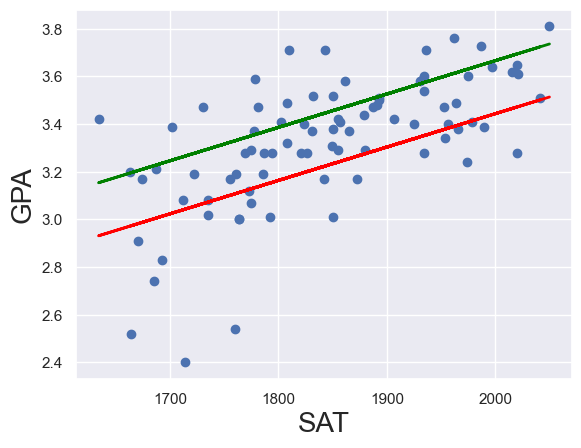

In [15]:
# creating a scatterplot to show relationship 
# y = b0 + b1x1
plt.scatter(data["SAT"], y)
y_no = 0.6439 + 0.0014*data["SAT"]
y_true = 0.8665 + 0.0014*data["SAT"]
plt.plot(data["SAT"], y_no, lw= 2, c = 'red')
plt.plot(data["SAT"], y_true, lw= 2, c = 'green')
plt.xlabel("SAT", fontsize= 20)
plt.ylabel("GPA", fontsize= 20)
plt.show()

In [16]:
x1

,const,SAT,Attendance
0,1.0,1714,0
1,1.0,1664,0
2,1.0,1760,0
3,1.0,1685,0
4,1.0,1693,0
...,...,...,...
79,1.0,1936,1
80,1.0,1810,1
81,1.0,1987,0
82,1.0,1962,1
